In [1]:

import numpy as np
import pandas as pd
import sys
from __future__ import annotations
import os

sys.path.append(os.path.dirname(os.getcwd()))

from lib.fast_velocity import beard_terminal_velocity_numba
from lib.sympy_helper import get_function_from_output

In [2]:
diameter = np.logspace(np.log10(1e-6), np.log10(7e-3), 10_000)
temperature = np.full_like(diameter, 285)
pressure = np.full_like(diameter, 90_000)

simple_df = pd.DataFrame({
    'diameter': diameter,
    'temperature': temperature,
    'pressure': pressure,
})
simple_df['v_t'] = beard_terminal_velocity_numba(simple_df['diameter'].values, simple_df['temperature'].values, simple_df['pressure'].values)

In [3]:
ref_func = get_function_from_output("msre-ref-4")
ref_50_func = get_function_from_output("msre-ref-4", 50)

In [4]:
simple_df['ref_vt'] = simple_df.apply(lambda row: float(ref_func(row['diameter'])), axis=1)
simple_df['ref_abs'] = np.abs(simple_df['v_t'] - simple_df['ref_vt'])
simple_df['ref_rel'] = simple_df['ref_abs'] / simple_df['v_t']

simple_df['ref_50_vt'] = simple_df.apply(lambda row: float(ref_50_func(row['diameter'])), axis=1)
simple_df['ref_50_abs'] = np.abs(simple_df['v_t'] - simple_df['ref_50_vt'])
simple_df['ref_50_rel'] = simple_df['ref_50_abs'] / simple_df['v_t']

In [5]:
simple_df[['ref_rel', 'ref_50_rel']].describe()

,ref_rel,ref_50_rel
count,1.000000e+04,1.000000e+04
mean,2.031548e-03,6.765398e-03
std,1.839648e-03,4.987787e-03
min,4.584754e-07,8.291050e-07
25%,7.147483e-04,2.819551e-03
50%,1.357636e-03,5.475555e-03
75%,2.993409e-03,1.011370e-02
max,1.045536e-02,2.274975e-02


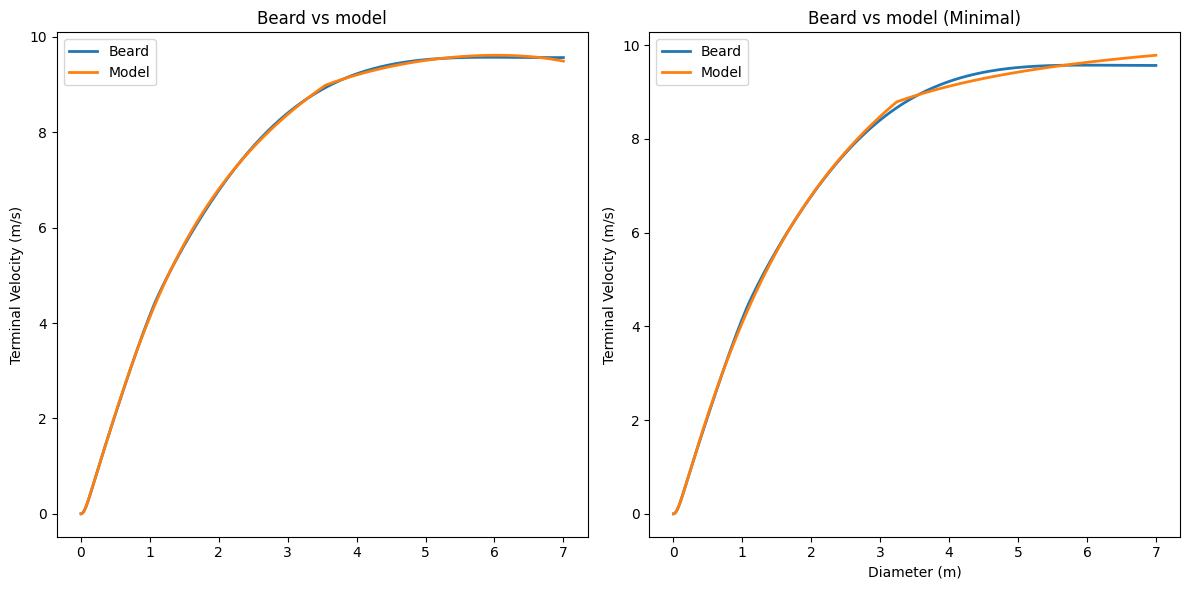

In [6]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)   # 2 rows × 1 column

# --- Plot 1: Beard vs ref_vt ---------------------------------
axes[0].plot(simple_df['diameter'] * 1000, simple_df['v_t'],  label='Beard', lw=2)
axes[0].plot(simple_df['diameter'] * 1000, simple_df['ref_vt'], label='Model', lw=2)
axes[0].set_ylabel('Terminal Velocity (m/s)')
axes[0].legend()
axes[0].set_title('Beard vs model')            # optional

# --- Plot 2: Beard vs ref_50_vt ------------------------------
axes[1].plot(simple_df['diameter'] * 1000, simple_df['v_t'],        label='Beard', lw=2)
axes[1].plot(simple_df['diameter'] * 1000, simple_df['ref_50_vt'],  label='Model', lw=2)
axes[1].set_xlabel('Diameter (m)')
axes[1].set_ylabel('Terminal Velocity (m/s)')
axes[1].legend()
axes[1].set_title('Beard vs model (Minimal)')            # optional

plt.tight_layout()
plt.show()


In [7]:
simple_df[simple_df['ref_vt'].diff() < 0][['diameter', 'ref_vt']]

,diameter,ref_vt
9832,0.006038,9.615581
9833,0.006043,9.615569
9834,0.006048,9.615550
9835,0.006054,9.615525
9836,0.006059,9.615493
...,...,...
9995,0.006975,9.499307
9996,0.006981,9.497612
9997,0.006988,9.495900
9998,0.006994,9.494171
